# BootCamp 2019 - Week 5

## Pandas - 4: Time Series

<img src="Img_panda4.jpg" width="400">

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Problem 1

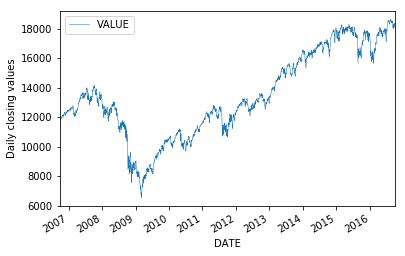

In [2]:
djia = pd.read_csv("DJIA.csv")
djia.index = pd.to_datetime(djia["DATE"], format="%Y-%m-%d")
djia = djia.drop(columns="DATE")
djia = djia[djia["VALUE"] != "."]
djia["VALUE"] = djia["VALUE"].apply(pd.to_numeric)
djia.plot(y="VALUE", lw=.5)
plt.ylabel("Daily closing values")
plt.show()

### Problem 2

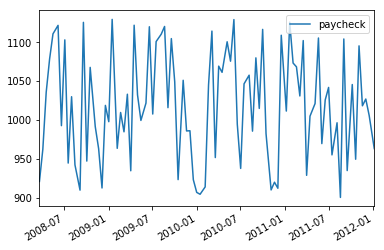

In [3]:
pay = pd.read_csv("paychecks.csv")
index1 = pd.date_range(start='3/13/2008', periods=len(pay)/2, freq="WOM-1FRI")
index2 = pd.date_range(start='3/13/2008', periods=len(pay)/2, freq="WOM-3FRI")
pay.index = index1.union(index2)
pay.columns = ["paycheck"]
pay.plot(y="paycheck")
plt.show()

### Problem 5

In [4]:
djia_gainD = djia - djia.shift(1)
djia_gainD = djia_gainD.dropna()

print("Single day with the largest gain")
print(djia_gainD[djia_gainD["VALUE"] == max(djia_gainD["VALUE"])])
print("\nSingle day with the largest loss")
print(djia_gainD[djia_gainD["VALUE"] == min(djia_gainD["VALUE"])])

print("\n----------------------------------\n")

djia_gainM = djia.resample("M").last().shift(-1,freq="MS")-djia.resample("MS").first()
djia_gainM.index = pd.to_datetime(djia_gainM.index, format = '%Y-%m-%d').strftime('%Y-%m')

print("Month with the largest gain")
print(djia_gainM[djia_gainM["VALUE"] == max(djia_gainM["VALUE"])])
print("\nMonth with the largest loss")
print(djia_gainM[djia_gainM["VALUE"] == min(djia_gainM["VALUE"])])


Single day with the largest gain
             VALUE
DATE              
2008-10-13  936.42

Single day with the largest loss
             VALUE
DATE              
2008-09-29 -777.68

----------------------------------

Month with the largest gain
           VALUE
2015-10  1391.53

Month with the largest loss
           VALUE
2008-10 -1506.06


### Problem 6

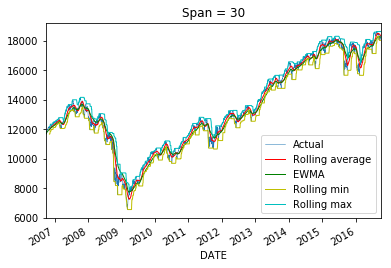

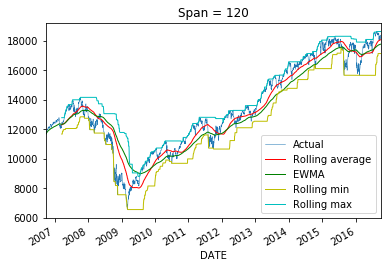

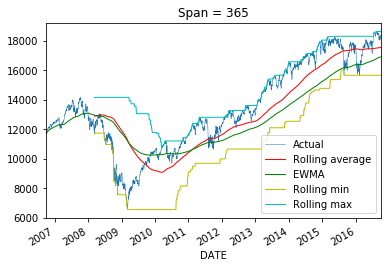

In [5]:
span_vec = np.array([30, 120, 365])
for span in span_vec:
    fig, ax = plt.subplots()
    ax.plot(djia, lw=.5)
    djia.rolling(span).mean().plot(color='r', lw=1, ax=ax)
    djia.ewm(span).mean().plot(color='g', lw=1, ax=ax)
    djia.rolling(span).min().plot(color='y', lw=1, ax=ax)
    djia.rolling(span).max().plot(color='c', lw=1, ax=ax)
    ax.legend(["Actual", "Rolling average", "EWMA", "Rolling min", "Rolling max"], loc="lower right")
    plt.title("Span = {}".format(span))
    plt.show()